In [2]:
import networkx as nx
from wisdom_of_crowds import Crowd
import random
import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
BG = nx.generators.random_graphs.fast_gnp_random_graph(5000, 0.0005, seed=1, directed=True)
for node in BG:
    coin = random.randint(0, 1)
    BG.nodes[node]['T'] = coin
print(BG)

start = datetime.datetime.now()
print(start)
hs = [] 
test = Crowd(BG)
for node in test.node_set:
    hs.append(test.h_measure(node))
print("total elapsed:",datetime.datetime.now()-start)

DiGraph with 5000 nodes and 12491 edges
2021-10-26 12:12:57.068465
total elapsed: 0:00:19.986280


[(2, 1292), (3, 1159), (1, 988), (4, 706), (0, 414), (5, 338), (6, 103)]


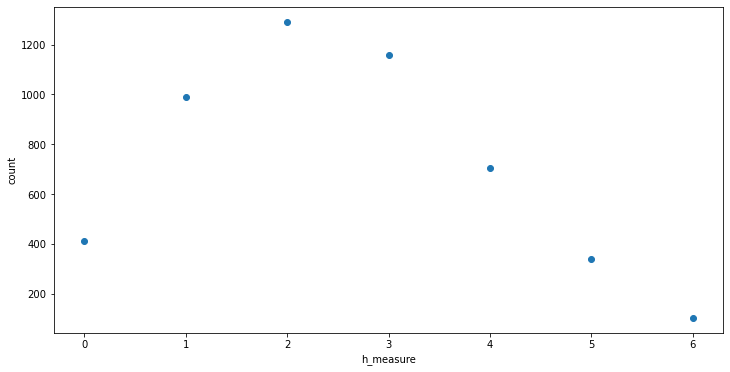

In [4]:
c = Counter(hs)
print(c.most_common())

plt.figure(figsize=(12,6))
xs = range(7)
ys = [c[x] for x in xs]
plt.scatter(xs,ys)
plt.xlabel('h_measure')
plt.ylabel('count')
plt.show()

Generate random small DiGraph to test out D_edge()
Nodes are labelled by the (randomly assigned between 1 and 6) topic they transmit, each transmitting only one.

Node:  0 Topic:  6 Predecessors: 
1 2 10 11 
Node:  1 Topic:  2 Predecessors: 
5 
Node:  2 Topic:  3 Predecessors: 
3 4 6 7 
Node:  3 Topic:  5 Predecessors: 
8 
Node:  4 Topic:  5 Predecessors: 

Node:  5 Topic:  6 Predecessors: 
9 
Node:  6 Topic:  6 Predecessors: 

Node:  7 Topic:  6 Predecessors: 

Node:  8 Topic:  2 Predecessors: 

Node:  9 Topic:  2 Predecessors: 

Node:  10 Topic:  6 Predecessors: 

Node:  11 Topic:  3 Predecessors: 



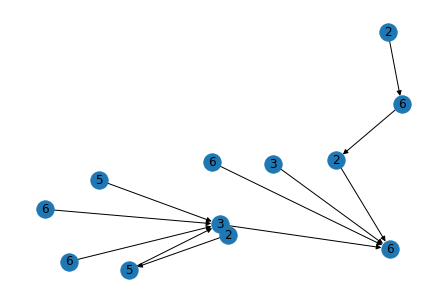

In [66]:
seed = 1  # Seed random number generators for reproducibility
DG = nx.gn_graph(12, seed=seed)
labels = {}
for node in DG:
    die = random.randint(0, 5) + 1
    DG.nodes[node]['T'] = die
    labels[node] = DG.nodes[node]['T'] #using dictionary lookup rather than just assigning value of die as the label to make sure values have been assigned to nodes correctly
    print("Node: ", node, "Topic: ", DG.nodes[node]['T'], "Predecessors: ")
    output = str()
    for p in DG.predecessors(node):
        output += str(p)
        output += " "
    print(output)
nx.draw(DG, labels=labels)


Test D_edge() on above randomly-generated digraph

In [86]:
edge_test = Crowd(DG)
print(edge_test.D_edge(1))


None
